# 🔹 Introduction to Multiple Linear Regression (MLR)


In Simple Linear Regression, we had:
> **One input → One output**

Now, in **Multiple Linear Regression**, we move to:
> **Multiple inputs → One output**

---

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Datasets/3_advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Checking if there are any 2 features having high corelation to remove one of them to improve model performance

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
pred_var = 'Sales'
X = df.drop(pred_var, axis = 1) # predictors
y = df[pred_var] # target variable
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

TO check relationships between X and y we plot scatter plot

[]

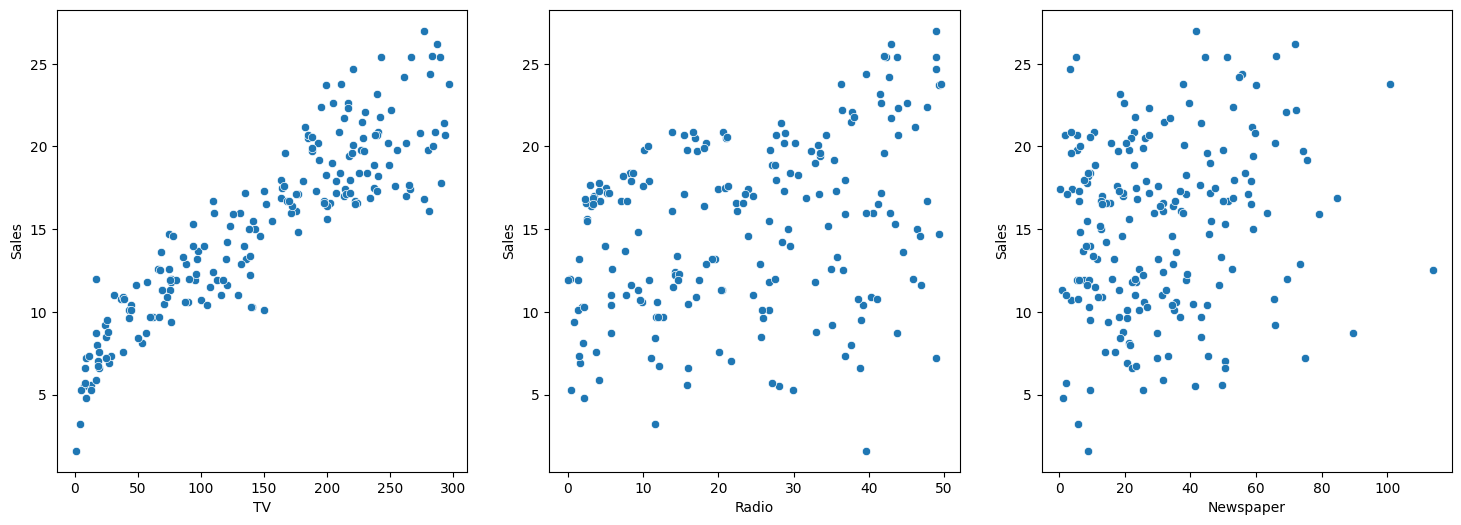

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.scatterplot(x = df['TV'], y = df['Sales'])
plt.subplot(1,3,2)
sns.scatterplot(x = df['Radio'], y = df['Sales'])
plt.subplot(1,3,3)
sns.scatterplot(x = df['Newspaper'], y = df['Sales'])
plt.plot()


<Axes: >

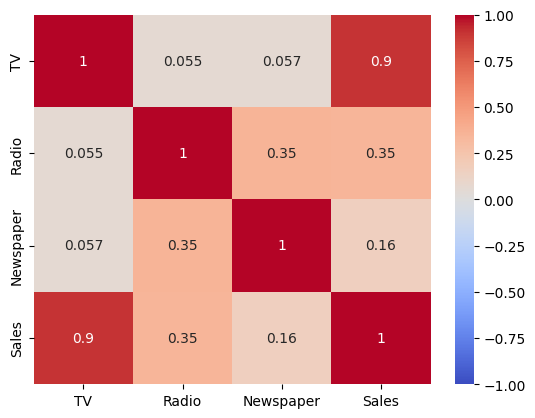

In [29]:
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm',vmax=1,vmin=-1)

### 🔍 Why VIF is Important in MLR:

In Multiple Linear Regression, we use multiple features to predict a target.

Sometimes, two or more features are strongly correlated with each other (e.g., Education_Level and Years_of_Schooling).

This creates multicollinearity, which makes it hard for the model to understand which feature is really influencing the output.



#### What VIF Tells you:

VIF Score:
- 1 - No multicollinearity (ideal)
- 1-5 - Moderate multicollinearity (acceptable)
- greatet than >5 or 10 - High multicollinearity (potential problem)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


### Interpretation of Results:
- Correlation Matrix - Helps to visually inspect pariwise correlations. 
- VIF:
     - VIF = 1: No correlation between the independent variable and the others.
     - 1<VIF<5 : Moderate correlation, usually acceptable.
     - VIF > 5: Potential multicollinearity problem. Some use a threshold of 10.

### What to do if multicollinearity is detected : 
- Remove Variables: Consider removing one of the correlated variables.
- Combine Variables: Combine correlated variables into a single predictor.
- Regularization techniques: Use techniques like Ridge Regression or Lasso Regression to handle multicolllinearity by adding a penalty to the coefficients.

### Split the data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# test_size = 0.3 means 30% and training size is 70%
# random_state = 42 means serial number onwards it is going to pickup 70% of the data


In [34]:
X_train.shape

(140, 3)

In [35]:
y_train.shape

(140,)

In [36]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
predictions = model.predict(X_test)

In [40]:
test_results = pd.DataFrame(
    {
        'Original Sales (Test)':y_test,
        'Predicted Sales (Test)':predictions
    }
)
test_results.head()

,Original Sales (Test),Predicted Sales (Test)
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368


### Testing Results

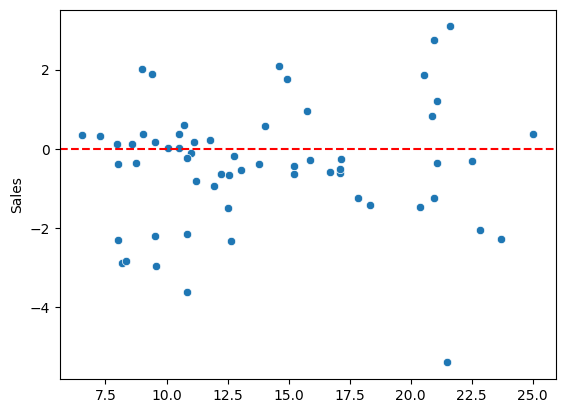

In [43]:
residual_test = y_test - predictions

sns.scatterplot(x = predictions, y = residual_test)
plt.axhline(0, color = 'r', linestyle = '--')

From Residual Plot - seems like no clear pattern and seems like model is performing well.

### 📉 If Residuals Show a Systematic Pattern...

🔍 What It Indicates:

A clear curve, slope, or funnel shape in the residuals means your model is 

violating key assumptions of linear regression — especially linearity and homoscedasticity (constant variance).

This usually points to:

A nonlinear relationship that linear regression can’t capture

Missing variables or interactions in the model

Possible underfitting

## Underfitting - If residual shows clear pattern (curver, slope)

### 🔻 Underfitting

Clues:

Residuals show clear pattern (e.g., curve, slope)

R² is low on both training and test sets

Model is too simple to capture true data structure

Common Causes:

Using only linear terms when the relationship is nonlinear

Leaving out important features

Remedies:

✅ Add polynomial features (e.g., degree 2 or 3)

✅ Include interaction terms

✅ Apply log/sqrt transformations

✅ Switch to a more complex model (e.g., decision tree)

## Overfitting - 
### 🔺 Overfitting

Clues:

Residuals look random on training data, but prediction errors are high on test data

High R² on training, low R² on test

Too many predictors or overly complex model

Common Causes:

Model memorizes noise instead of generalizing patterns

Remedies:

✅ Simplify the model (remove unnecessary features)

✅ Use regularization: Ridge or Lasso regression

✅ Apply cross-validation to detect overfitting early

✅ Gather more data if possible

